# All the techniques for handling missing values::

    1. Mean/ Median/Mode replacement
    2. Random Sample Imputation
    3. Capturing NAN values with a new feature
    4. End of Distribution imputation
    5. Arbitrary imputation
    6. Frequent categories imputation(for categorical variables)

# Different types of missing data

## 1. MCAR(Missing Completely At Random)
    A variable is missing completely at random(MCAR) if the probability of being missing is the same for all observations.
    When data is MCAR there is absolutely no relationship between the data missing and any other values,observed or missing, within the dataset.
    In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other
    

In [7]:
import pandas as pd

data = pd.read_csv('titanic.csv')
pd.pandas.set_option('display.max_columns',None)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
## checking null values in our dataset
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
## Embarked features have 2 records with nan/NUll value
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## 2. Missing Data Not At Random(MNAR):
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [13]:
import numpy as np

data['cabin_null'] = np.where(data['Cabin'].isnull(),1,0) ## 1->NaN, 0-> NOt null

## finding the percentage of NaN values present
print("Percentage of NaN in Cabin feature is : {}".format(data['cabin_null'].mean()))

Percentage of NaN in Cabin feature is : 0.7710437710437711


In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [15]:
data.groupby(['Survived'])

In [16]:
data.groupby(['Survived'])['cabin_null']

In [17]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

So 87.6% of values of the Cabin Feature are nan values in the category of people wh0 didn't survived.
And 60.23% of values of the Cabin Faetures are nan values for that category of people who managed to survive.

## 3. Missing At Random(MAR)
    for example --> In a survey some Men---hide their salary
    for example --> IN a survey some Women---hide their age

# All the techniques for handling missing values::

    1. Mean/ Median/Mode replacement
    2. Random Sample Imputation
    3. Capturing NAN values with a new feature
    4. End of Distribution imputation
    5. Arbitrary imputation
    6. Frequent categories imputation

## A). Mean/ MEdian /Mode imputation(When should we apply?)::
---> Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [18]:
data = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
data.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [22]:
## null values
data.isnull()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [23]:
## null values count
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
## null values percentage
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

So Age feature has 19.86% missing values.

In [25]:
def impute_nan(dataframe,feature,median):
    dataframe[feature+'_median'] = dataframe[feature].fillna(median)

In [27]:
median = data['Age'].median()
print("Median is : ",median)
print('--'*35)
impute_nan(data,'Age',median)
data.head(10)

Median is :  28.0
----------------------------------------------------------------------


,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [28]:
## std/standard deviation -> a quantity expressing by how much the members of 
## a group differ from the mean value for the group.
print(data['Age'].std())
print(data['Age_median'].std())

14.526497332334044
13.019696550973194


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

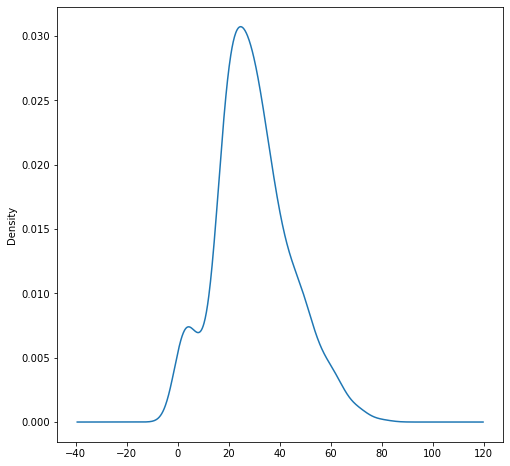

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)

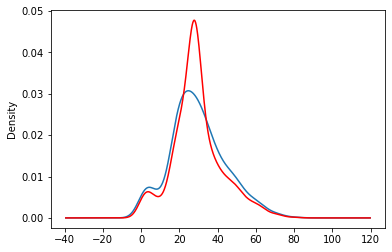

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)
data['Age_median'].plot(kind='kde',ax=ax,color='red')
handles,labels = ax.get_legend_handles_labels()

In [40]:
print(handles)

[<matplotlib.lines.Line2D object at 0x7fb7c9cbf6a0>, <matplotlib.lines.Line2D object at 0x7fb7c9c515e0>]


In [41]:
print(labels)

['Age', 'Age_median']


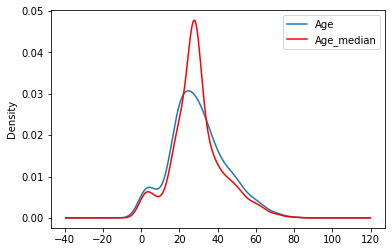

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)
data['Age_median'].plot(kind='kde',ax=ax,color='red')
handles,labels = ax.get_legend_handles_labels()  ##Return handles and labels for legend
ax.legend(handles,labels,loc='best') ##Place a legend on the Axes

## Advantages And Disadvantages of Mean/Median Imputation

## Advantages::
    1. Easy to implement(Robust to outliers).
    2. Faster way to obtain the complete dataset.
## Disadvantages::
    1. Change or Distortion in the original variance
    2.Impacts Correlation


# B). Random Sample Imputation
    Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

## When should it be used? 
    It assumes that the data are missing completely at random(MCAR)

In [64]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
pd.pandas.set_option('display.max_columns',None)
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [65]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [66]:
## percentages of NaN
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [67]:
data.Age.isnull().sum()

177

In [68]:
data['Age'].dropna()  
## Returns DataFrame or None
    # DataFrame with NA entries dropped from it or None if inplace=True.

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [73]:
## DataFrame.sample() method --> Return a random sample of items from an axis of object.
## Parameters = n = Number of items from axis to return


## Getting 177 random samples from the data left after removing NaN records 
random_sample = data['Age'].dropna().sample(n=data['Age'].isnull().sum(),random_state=0)
random_sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [74]:
## Values of all the indices
for i in random_sample:
    print(i)

28.0
50.0
0.92
36.0
26.0
36.0
31.0
65.0
65.0
47.0
22.0
26.0
4.0
39.0
21.0
55.0
33.0
0.75
24.0
39.0
20.0
40.0
14.0
29.0
30.0
0.75
36.0
21.0
27.0
40.0
32.0
2.0
20.0
52.0
35.0
42.0
38.0
36.0
20.0
15.0
22.0
21.0
42.0
21.0
28.0
5.0
3.0
24.0
35.0
28.0
38.0
24.0
25.0
32.0
57.0
25.0
13.0
25.0
62.0
42.0
38.0
51.0
26.0
20.0
16.0
29.0
40.0
35.0
2.0
23.0
22.0
36.0
18.0
39.0
58.0
27.0
18.0
19.0
29.0
23.0
0.42
49.0
45.0
33.0
58.0
24.0
34.0
39.0
31.0
57.0
22.0
23.5
23.0
8.0
62.0
4.0
33.0
18.0
26.0
32.0
24.0
28.0
45.0
36.0
19.0
29.0
24.0
50.0
43.0
16.0
21.0
27.0
4.0
36.0
64.0
32.0
34.0
41.0
34.0
17.0
19.0
28.0
26.0
28.0
52.0
36.0
4.0
48.0
43.0
36.0
60.0
45.0
27.0
35.0
27.0
21.0
31.0
5.0
30.0
19.0
32.5
38.0
24.0
36.0
25.0
35.0
45.5
31.0
30.0
22.0
22.0
27.0
43.0
20.0
18.0
22.0
11.0
29.0
24.5
17.0
20.0
56.0
21.0
2.0
30.0
19.0
49.0
36.0
8.0
80.0
50.0
18.0
22.0
25.0
15.0
34.0
15.0


In [70]:
data[data['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [71]:
data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

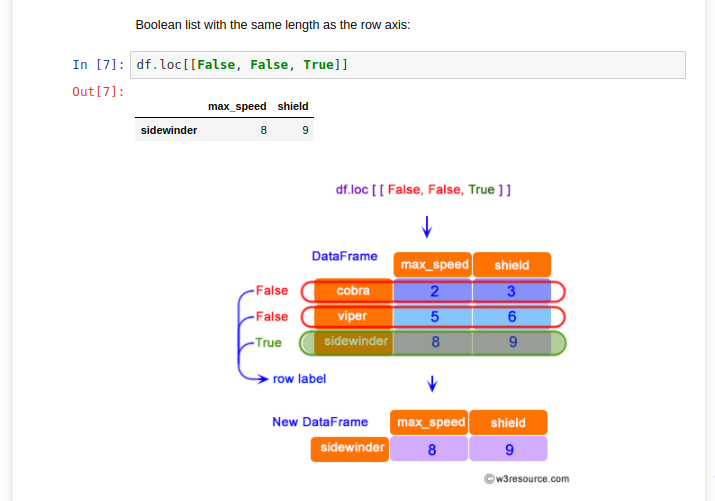

In [72]:
## handling the missing values

def impute_nan(dataframe,feature,median):
    data[feature+'_median'] = data[feature].fillna(median)
    data[feature+'_random'] = data[feature]
    
    ##It will have the random sample to fill the na
    random_sample = data[feature].dropna().sample(n=data[feature].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = data[data['Age'].isnull()].index
    ##The loc property is used to access a group of rows and columns by label(s) or a boolean array.
    data.loc[data['Age'].isnull(),feature+'_random'] = random_sample

In [76]:
median = data['Age'].median()
median

28.0

In [77]:
## calling our impute_nan function

impute_nan(data,'Age',median)
data.head(50)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


In [79]:
print("For Age feature std is : ",data['Age'].std())
print("For Age_median feature std is : ",data['Age_median'].std())
print("For Age_random feature std is : ",data['Age_random'].std())

For Age feature std is :  14.526497332334044
For Age_median feature std is :  13.019696550973194
For Age_random feature std is :  14.5636540895687


## NOTE::
A high standard deviation shows that the data is widely spread (less reliable) and a low standard deviation shows that the data are clustered closely around the mean (more reliable)

In [80]:
## plotting
import matplotlib.pyplot as plt
%matplotlib inline

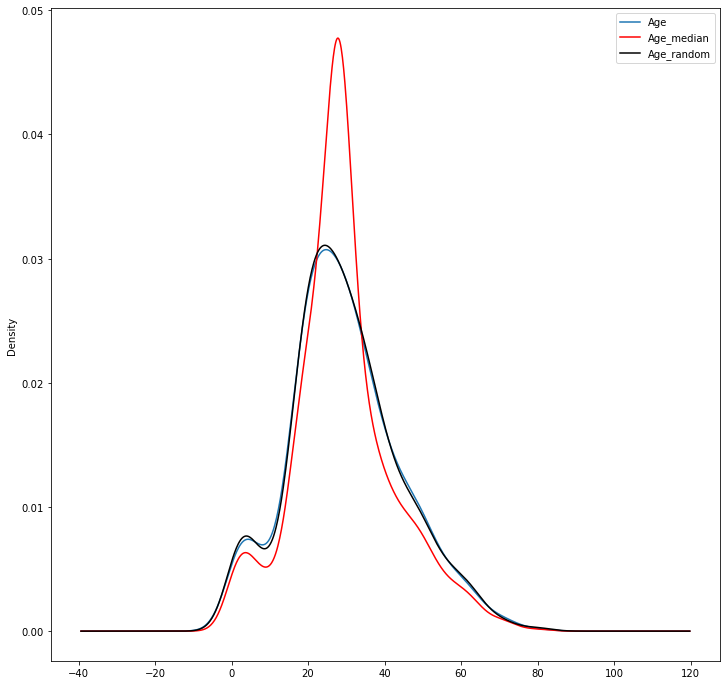

In [87]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

## All the type of Age features(i.e. 'Age','Age_median','Age_random') will be plotted on the same axis(111)
data['Age'].plot(kind='kde',ax=ax)
data['Age_median'].plot(kind='kde',ax=ax,color='red')
data['Age_random'].plot(kind='kde',ax=ax,color='black')
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles,labels,loc='best')

## Advantages of handling nan with random/median values::
    1. Easy To implement
    2. There is less distortion in variance
## Disadvantage of handling nan with random/median values::
    1. In Every situation randomness wont work

## C). Capturing NAN values with a new feature
    It works well if the data are not missing completely at random

In [88]:
import pandas as pd
import numpy as  np

data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [90]:
data['Age_nan'] = np.where(data['Age'].isnull(),1,0)
data.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [92]:
median = data['Age'].median()
median

28.0

In [94]:
## SO all nan values inside Age feature will be replaced by median
data['Age'].fillna(median,inplace=True)
data.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages of handling missing values using method of capturing NAN values with a new feature::
    1. Easy to implement
    2. Captures the importance of missing values
## Disadvantages of handling missing values using method of capturing NAN values with a new feature::
    1. Creating Additional Features(Curse of Dimensionality)

## D). End of Distribution Imputation::
If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. 

## Assumptions for End of Distribution Imputation:
    · MNAR — values are not missing at random.
    · If the value is not missing at random, we don’t want to replace it for the mean/median and therefore make that observation look like the majority of our observations. Instead, we want to flag that observation as different, and therefore we assign a value that is at the tail of the distribution, where observations are rarely represented in the population.

In [143]:
import pandas as pd
import numpy as np
 
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<AxesSubplot:>

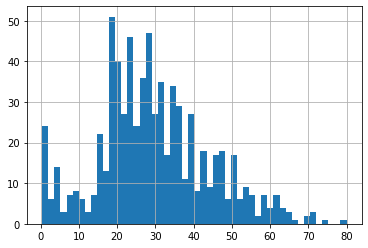

In [144]:
data['Age'].hist(bins=50)

<AxesSubplot:xlabel='Age'>

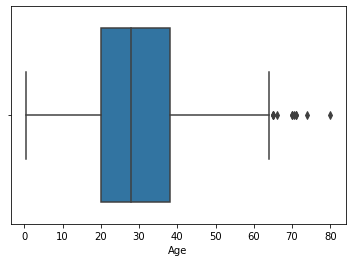

In [145]:
## let's have a look at the presence of outliers
import seaborn as sns

sns.boxplot(x='Age',data=data)

Since all of the outliers of Age feature are present on the right side of the distribution according to above boxplot. 

So we will use the right end Distribution for imputation.

## Reason for multiplying by 3 while finding extereme is shown below:

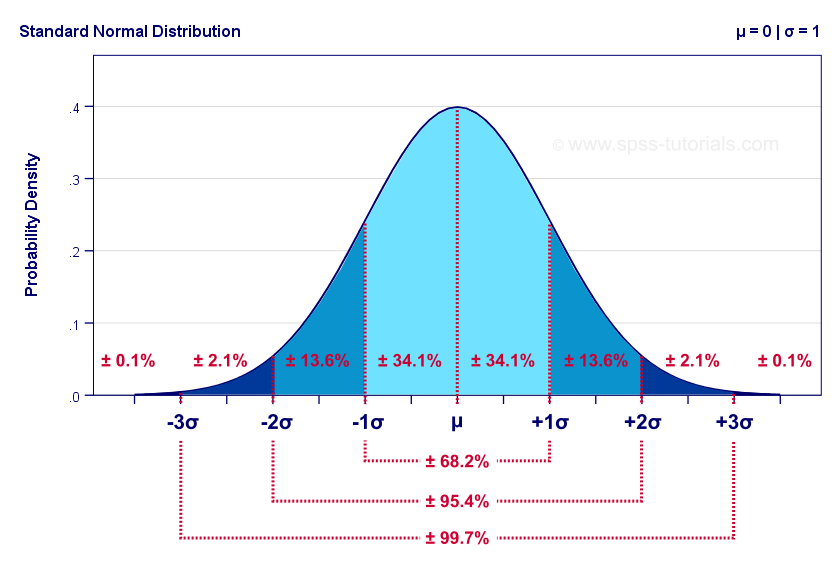

In [146]:
extreme_right = data['Age'].mean() + 3*data['Age'].std()
median = data['Age'].median()

In [150]:
## Defining imputation function

def impute_nan(dataframe,feature,median,extreme_value):
    dataframe[feature+'_End_Distribution'] = data[feature].fillna(extreme_value)
    dataframe[feature].fillna(median,inplace=True)

In [151]:
## Calling imputation function

impute_nan(data,'Age',median,extreme_right)

In [152]:
data.head(20)

,Survived,Age,Fare,Age_End_Distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [153]:
print("For Age feature the std is ",data['Age'].std())
print("For Age_End_Distribution feature the std is ",data['Age_End_Distribution'].std())

For Age feature the std is  13.019696550973194
For Age_End_Distribution feature the std is  21.719150677136366


<AxesSubplot:>

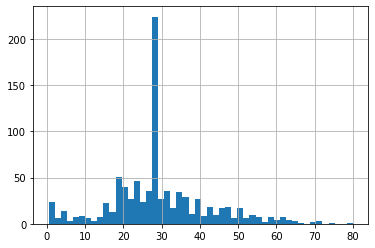

In [154]:
data['Age'].hist(bins=50)

array([[<AxesSubplot:title={'center':'Age_End_Distribution'}>]],
      dtype=object)

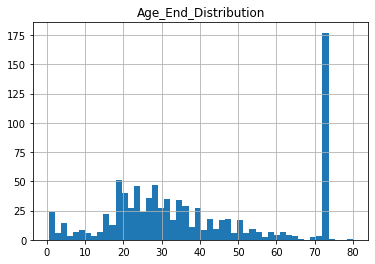

In [155]:
data.hist('Age_End_Distribution',bins=50)

<AxesSubplot:xlabel='Age_End_Distribution'>

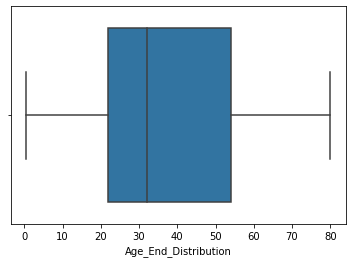

In [156]:
## Now checking the outliers after imputation

sns.boxplot(x='Age_End_Distribution',data=data)

So we can  see the outliers are also gone/masked after End Distribution imputation.

## Advantages of End Distribution Imputation:
    · Easy to implement
    · Fast way of obtaining complete datasets
    · Can be integrated into production (during model deployment)
    · Captures the importance of “missingness” if there is one
## Disadvantages of End Distribution Imputation:
    · Distortion of the original variable distribution
    · Distortion of the original variance
    · Distortion of the covariance with the remaining variables of the dataset
    · This technique may mask true outliers in the distribution

## E. Arbitrary Value Imputation::
    1. This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value.
    2. Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value.
    3. Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).
    4. Suitable for both numerical and categorical variables.

## Assumptions for Arbitrary value imputation::
    · Data is not missing at random.
    · If this is the case, we want to flag the missing values with a different (arbitrary) value, instead of replacing those occurrences with the mean or the median, which represent the most common value.

In [157]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
data.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [158]:
def impute_nan(dataframe,feature):
    dataframe[feature+'_zero'] = dataframe[feature].fillna(0)
    dataframe[feature+'_hundred'] = dataframe[feature].fillna(100)

In [161]:
## function calling
impute_nan(data,'Age')

data.head(10)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

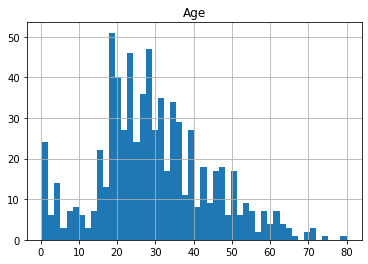

In [163]:
data.hist('Age',bins=50)

array([[<AxesSubplot:title={'center':'Age_zero'}>]], dtype=object)

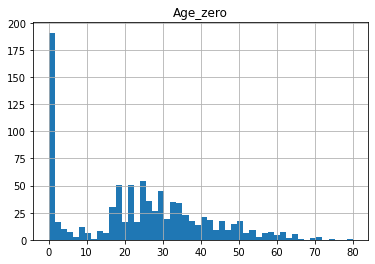

In [164]:
data.hist('Age_zero',bins=50)

array([[<AxesSubplot:title={'center':'Age_hundred'}>]], dtype=object)

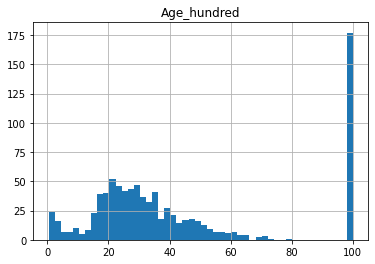

In [165]:
data.hist('Age_hundred',bins=50)

## Advantages of Arbitrary value imputation
    1. Easy to implement
    2. Captures the importance of missingess if there is one
## Disadvantages of Arbitrary value imputation
    1. Distorts the original distribution of the variable
    2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    3. Hard to decide which value to use
